# Dataset Overview

In this notebook we will show you how to easily load your model and take a look at some of it's stats and distributions. We will also show how to easily visualize the datapoints you've generated, and their respective visual modalities.

To learn more about our modalities, please visit our documentation at https://docs.datagen.tech/en/latest/Modalities/Modalities%20root.html

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from collections import Counter

import datagen

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
ds = datagen.load(DATASET_PATH)

## Dataset size

In [3]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 7


## Pie chart creation function

In [4]:
def category_pie(dataset, attribute_getter, figure_name):
    def category_list():
        categories = []
        for datapoint in dataset:
            categories += [attribute_getter(datapoint)]

        return categories
    count_dict = Counter(category_list())
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys(), autopct='%1.0f%%')


## Dataset distribution analysis

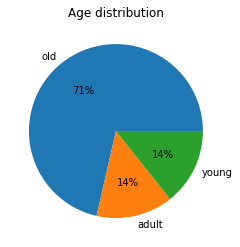

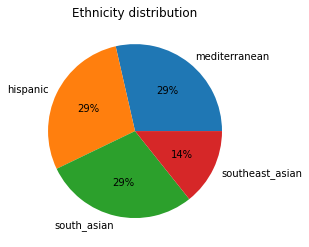

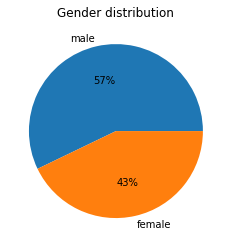

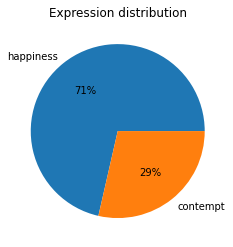

In [5]:
category_pie(ds, lambda dp : dp.actor_metadata.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.actor_metadata.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.actor_metadata.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.actor_metadata.face_expression.name, 'Expression distribution')

## Dataset visualization

Normalize and clamp infinite values from depth map for better visualization

In [6]:
def normalize_depth_map(depth_map):
    depth_map = depth_map.copy()
    depth_map[depth_map > 2**15] = depth_map[depth_map < 2**15].max()
    depth_map -= depth_map.min()
    depth_map /= depth_map.max()
    depth_map = 1 - depth_map
    return depth_map

Visualize the dataset as a grid

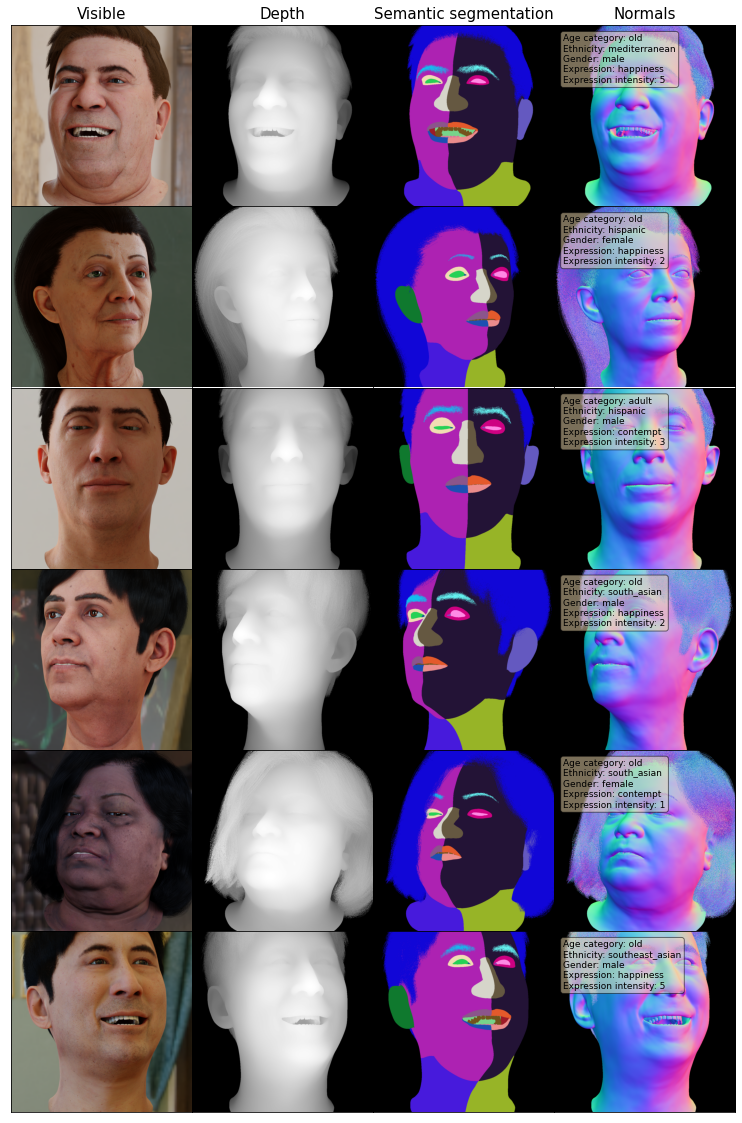

In [7]:
items_to_plot = min(len(ds), 6)
imgs_per_dp = 4
imgs, labels = [], []

for i in range(items_to_plot):
    imgs += [ds[i].visible_spectrum, normalize_depth_map(ds[i].depth), (ds[i].semantic_segmentation/255).astype(np.uint8), ds[i].normal_maps]
    labels += imgs_per_dp * [{'Age category': ds[i].actor_metadata.identity_label.age, 'Ethnicity': ds[i].actor_metadata.identity_label.ethnicity, 'Gender': ds[i].actor_metadata.identity_label.gender, 
    'Expression': ds[i].actor_metadata.face_expression.name, 'Expression intensity': str(ds[i].actor_metadata.face_expression.intensity_level)}]

font_size = 15
fig_shape = np.array((items_to_plot, imgs_per_dp))
fig_size = 5 * fig_shape
fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111, nrows_ncols=fig_shape, axes_pad=0.)

grid[0].set_title('Visible', size=font_size)
grid[1].set_title('Depth', size=font_size)
grid[2].set_title('Semantic segmentation', size=font_size)
grid[3].set_title('Normals', size=font_size)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for i, ax in enumerate(grid):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(imgs[i], cmap='gray')
    formatted_label = '\n'.join(key + ': ' + val for key, val in labels[i].items())
    if i % imgs_per_dp == 3:
        ax.text(0.05, 0.95, formatted_label, transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=props)
